# 🛠️ 1. Preparação dos dados

### 1.1 Extração do Arquivo Tratado

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('data\\telecomx_data_gold.csv')

In [26]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.758054


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

### 1.2 Remoção de Colunas Irrelevantes

In [28]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

In [29]:
df = df.drop('customerID', axis=1)
df.columns


Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

### 1.3 Encoding

In [30]:
# Criação de uma cópia do DataFrame, por garantia.
df_encoding = df.copy()

In [31]:
# Identificar colunas categóricas
colunas_categoricas = df_encoding.select_dtypes(include=['object', 'category']).columns
print("Colunas categóricas:", colunas_categoricas.tolist())

Colunas categóricas: ['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']


In [32]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_encoding, columns=colunas_categoricas, drop_first=True, dtype=int)

# Visualizar as novas colunas
df_encoded.head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.156476,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,1.969099,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.429323,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.221565,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.758054,...,1,0,1,0,0,0,0,0,0,1


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer.SeniorCitizen                         7043 non-null   int64  
 2   customer.Partner                               7043 non-null   int64  
 3   customer.Dependents                            7043 non-null   int64  
 4   customer.tenure                                7043 non-null   int64  
 5   phone.PhoneService                             7043 non-null   int64  
 6   account.PaperlessBilling                       7043 non-null   int64  
 7   account.Charges.Monthly                        7043 non-null   float64
 8   account.Charges.Total                          7043 non-null   float64
 9   Daily_Charges                                  7043 

### 1.4 Verificação da Proporção de Evasão

In [34]:
# Verificando a contagem de cada classe na coluna 'Churn'

count_churn = df_encoded['Churn'].value_counts()
print(count_churn)
print("Para 0 = Não Churn (Permaneceu), Para 1 = Churn (Evadiu)")

Churn
0    5174
1    1869
Name: count, dtype: int64
Para 0 = Não Churn (Permaneceu), Para 1 = Churn (Evadiu)


In [35]:
# Calculando a proporção em porcentagem

prop_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print(prop_churn.round(2))

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [36]:
# Avaliação de desequilíbrio
threshold = 0.10  # margem de 10% entre as classes para considerar equilibrado

majority_class_prop = prop_churn.max()
minority_class_prop = prop_churn.min()

print("\nAvaliação de desequilíbrio:")
if (majority_class_prop - minority_class_prop) > (threshold * 100):
    print("As classes estão desequilibradas.")
    print("Isso pode impactar negativamente o desempenho dos modelos preditivos.")
    print("Considere aplicar técnicas como SMOTE, undersampling ou class_weight.")
else:
    print("As classes estão razoavelmente equilibradas.")



Avaliação de desequilíbrio:
As classes estão desequilibradas.
Isso pode impactar negativamente o desempenho dos modelos preditivos.
Considere aplicar técnicas como SMOTE, undersampling ou class_weight.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\1972528806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_encoded, palette='Set2')


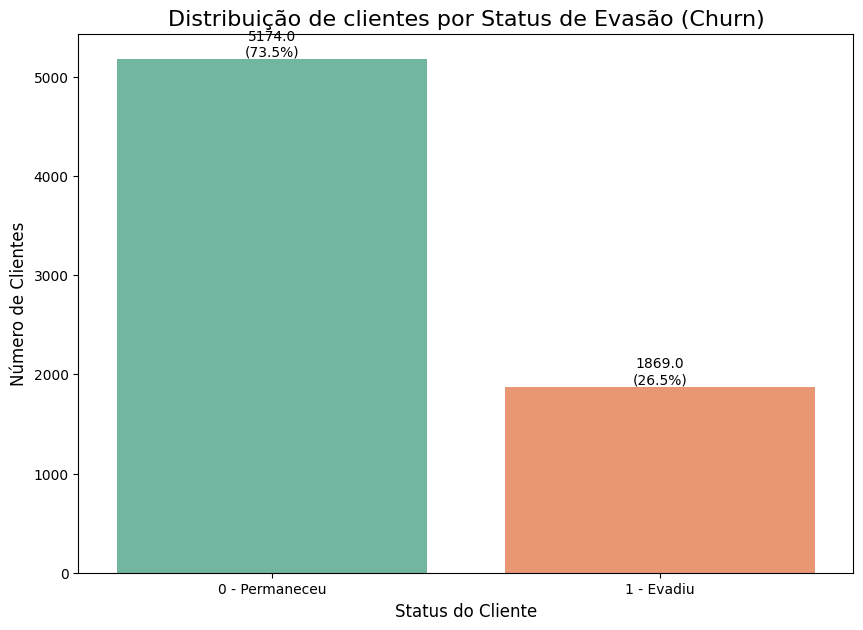

In [39]:
# Visualização da proporção com um gráfico de barras
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Churn', data=df_encoded, palette='Set2')
plt.title('Distribuição de clientes por Status de Evasão (Churn)', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])

# Adicionando os rótulos de contagem e porcentagem
total = len(df_encoded['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height +3,
            f'{height}\n({(height/total)*100:.1f}%)',
            ha="center", va='bottom')

plt.show()

A análise da variável alvo `Churn` revela um desequilíbrio entre as classes. Aproximadamente 73% dos clientes permaneceram ativos, enquanto 27% evadiram. Esse desequilíbrio pode impactar negativamente os modelos preditivos, favorecendo a classe majoritária e resultando em baixa capacidade de detectar corretamente os casos de churn. Por isso, técnicas de balanceamento, como oversampling (SMOTE) ou uso de métricas específicas (F1-score, recall), devem ser consideradas nas próximas etapas.


### 1.5 Balanceamento de Classes

In [40]:
# Usado o df_encoded que foi gerado na etapa de encoding

df_scaled = df_encoded.copy()

In [41]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

In [42]:
from sklearn.preprocessing import StandardScaler

# Aplicando o StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# Aplicando SMOTE
oversampling = SMOTE(random_state=42)
X_resampled, y_resampled = oversampling.fit_resample(X_scaled, y)


In [45]:
# Reconstruindo o DataFrame balanceado
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
df_balanceado = X_resampled_df.copy()
df_balanceado['Churn'] = y_resampled.values

In [46]:
print(df_balanceado['Churn'].value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\2000731372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_balanceado, palette='Set2')


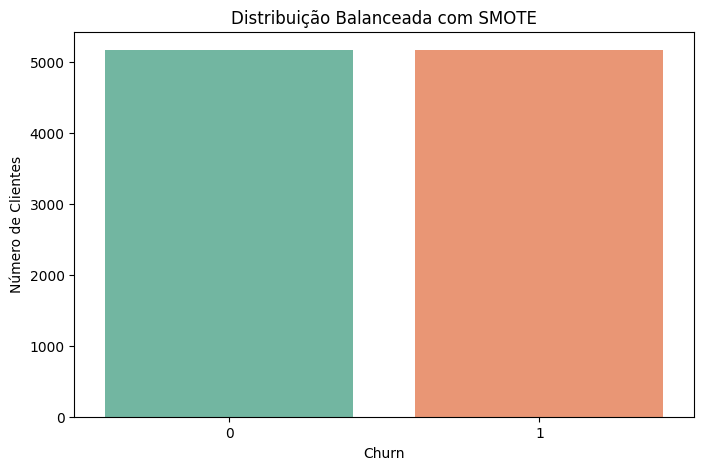

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df_balanceado, palette='Set2')
plt.title('Distribuição Balanceada com SMOTE')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


# 🎯 Correlação e Seleção de Variáveis

### 2.1 Análise de Correlação

In [48]:
# Matriz de correlação completa
correlation_matrix = df_balanceado.corr()

# Correlação com a variável alvo (Churn)
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)


Churn                                            1.000000
internet.InternetService_Fiber optic             0.350819
account.PaymentMethod_Electronic check           0.349677
account.PaperlessBilling                         0.245842
Daily_Charges                                    0.227751
account.Charges.Monthly                          0.227751
customer.SeniorCitizen                           0.153090
internet.StreamingTV_Yes                         0.076904
internet.StreamingMovies_Yes                     0.070932
phone.MultipleLines_Yes                          0.045548
phone.PhoneService                               0.014522
customer.gender_Male                             0.000952
phone.MultipleLines_No phone service            -0.014522
internet.DeviceProtection_Yes                   -0.082101
internet.OnlineBackup_Yes                       -0.104599
account.PaymentMethod_Mailed check              -0.110377
account.PaymentMethod_Credit card (automatic)   -0.171904
customer.Partn

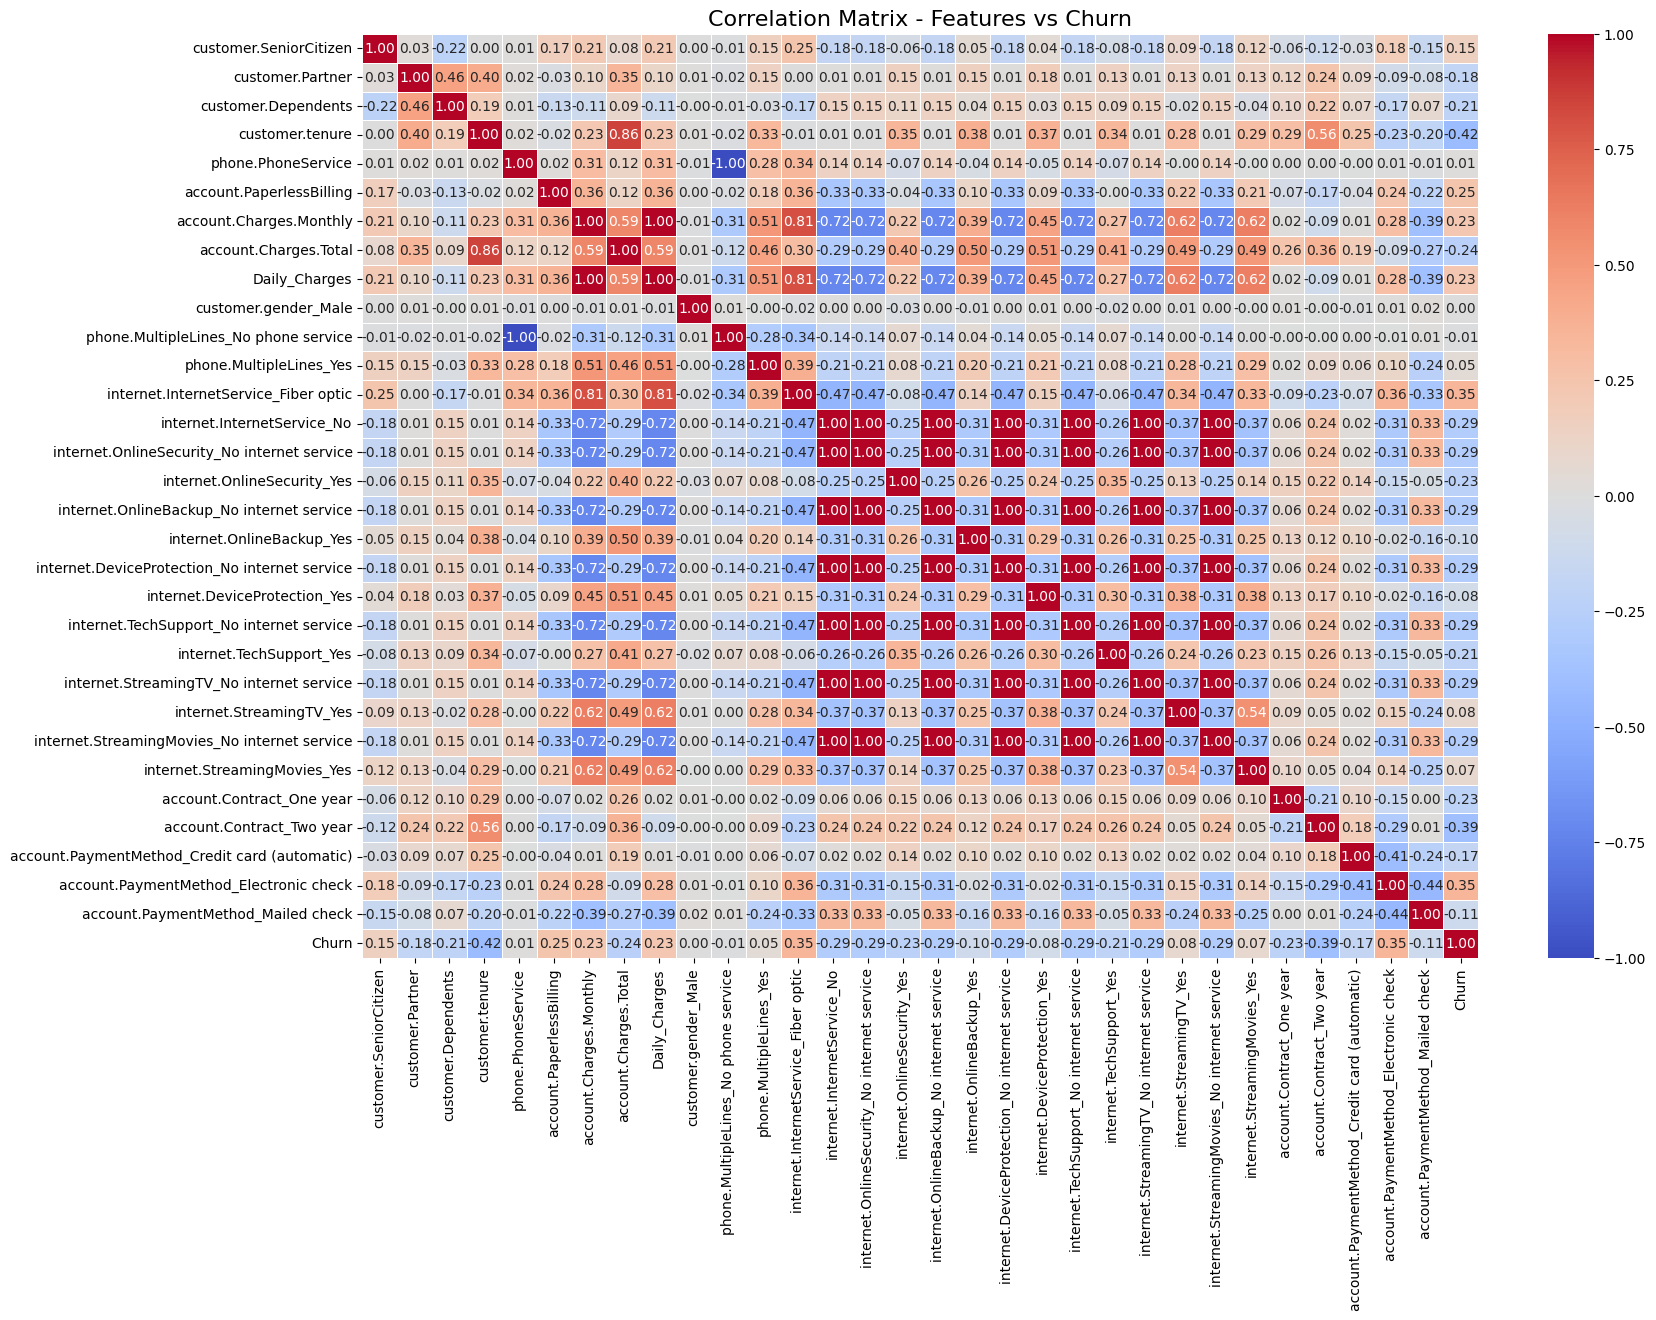

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Features vs Churn', fontsize=16)
plt.show()


### 2.2 Análises Direcionadas

- #### Tempo de contrato × Evasão

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\2026915879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded, palette='Set2')


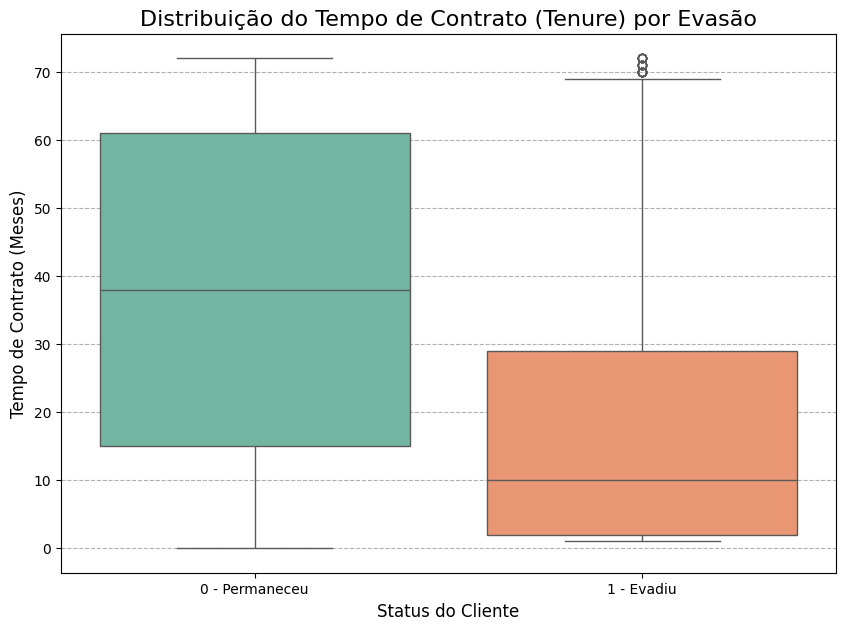

In [53]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded, palette='Set2')
plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

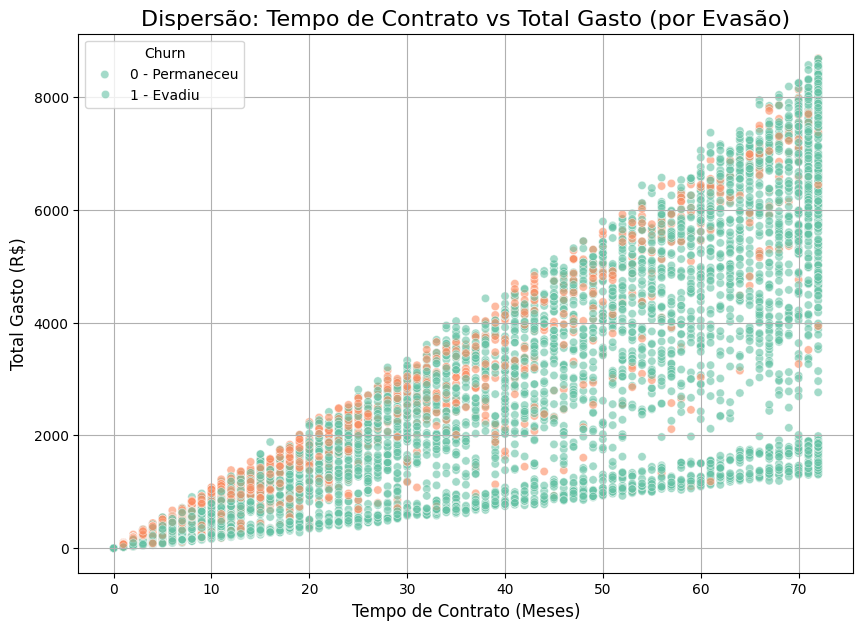

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_encoded, palette='Set2', alpha=0.6)
plt.title('Dispersão: Tempo de Contrato vs Total Gasto (por Evasão)', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.grid(True)
plt.legend(title='Churn', labels=['0 - Permaneceu', '1 - Evadiu'])
plt.show()


- ### Total gasto × Evasão

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\4254037505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded, palette='Set2')


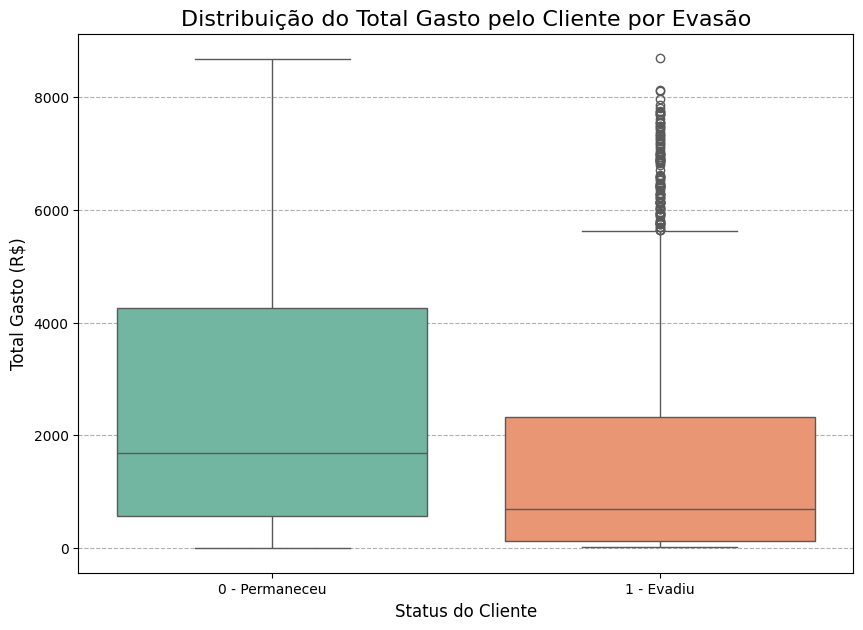

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded, palette='Set2')
plt.title('Distribuição do Total Gasto pelo Cliente por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

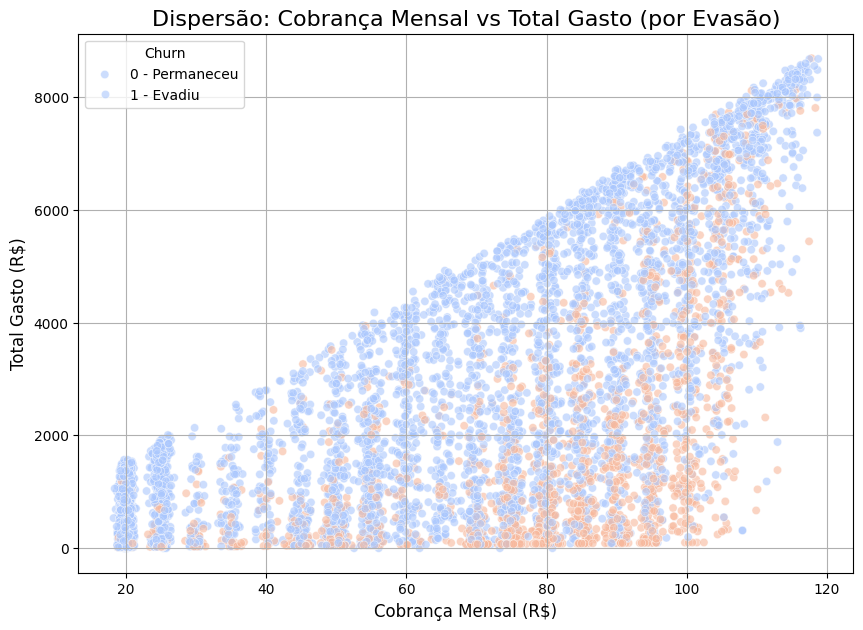

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='account.Charges.Monthly', y='account.Charges.Total', hue='Churn', data=df_encoded, palette='coolwarm', alpha=0.6)
plt.title('Dispersão: Cobrança Mensal vs Total Gasto (por Evasão)', fontsize=16)
plt.xlabel('Cobrança Mensal (R$)', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.grid(True)
plt.legend(title='Churn', labels=['0 - Permaneceu', '1 - Evadiu'])
plt.show()


# 🤖 Modelagem Preditiva

### 3.1 Separação de Dados

In [58]:
# Separar novamente os dados (caso ainda não tenha separado do DataFrame balanceado)
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para teste
    random_state=42,     # para reprodutibilidade
    stratify=y           # garante proporção equilibrada de classes
)

In [60]:
print("Treino:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTeste:")
print(y_test.value_counts(normalize=True) * 100)


Treino:
Churn
1    50.0
0    50.0
Name: proportion, dtype: float64

Teste:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


### 3.2 Criação de Modelos

- ### Modelo 01: KNN (K-Nearest Neighbors)

- Justificativa: Optei por um modelo KNN (K-Nearest Neighbors) por ser um algoritimo simples mas eficaz para problemas de classificação. Ele utiliza da similaridade entre os dados (distância euclidiana) para prever a classe de um novo ponto, e isso exige que os dados estejam na mesma escala, por isso, aplicamos a padronização com o StandardScaler. É muito útil para observar padrões locais e grupos de clientes similares.

✅ Checklist do que temos:
✔️ Dados balanceados com SMOTE (df_balanceado)

✔️ Dados padronizados com StandardScaler

✔️ Dados divididos em treino/teste (X_train, X_test, y_train, y_test)

Agora vamos seguir com:

1. Treinamento do modelo KNN

2. Predição no conjunto de teste

3. Avaliação do desempenho com métricas relevantes

4. Visualização da confusion matrix (opcional)

✅ 1. Treinar o modelo KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo com k=5 (valor comum inicial)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

✅ 2. Fazer previsões

In [63]:
# Prevendo os dados de teste

y_pred_knn = knn_model.predict(X_test)

- ### Modelo 02: Random Forest

- Justificativa: Optei por um modelo Random Forest que se baseia na robustez, com alta performace de generalização e resistência a overfitting. Como é um ensemble de árvore de decisão, ele lida bem com variáveis categóricas e com colinearidade, e não é tão sensivel à escala dos dados, dispensando a normalização. Também fornece a interpretabilidade por meaio da análise de importância das variáveis, o que facilita para a explicação do modelo para a área de negócios.

✅ Etapas que vamos seguir com o modelo Random Forest:
Separar os dados sem padronização (usando df_encoded, não df_balanceado)

1. Aplicar SMOTE novamente nesses dados crus

2. Separar treino e teste

3. Treinar o modelo RandomForestClassifier

4. Avaliar desempenho com métricas + matriz de confusão

✅ 1. Preparar dados SEM normalização

Aqui vamos usar os dados com encoding e balanceados via SMOTE, mas sem o StandardScaler:

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X e y do df_encoded (não normalizado)
X_raw = df_encoded.drop('Churn', axis=1)
y_raw = df_encoded['Churn']

# Aplicando SMOTE
smote_rf = SMOTE(random_state=42)
X_bal_rf, y_bal_rf = smote_rf.fit_resample(X_raw, y_raw)

# Separando treino e teste (80/20)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_bal_rf, y_bal_rf, test_size=0.2, random_state=42, stratify=y_bal_rf
)


✅ 2. Treinar o modelo Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(random_state=42)

✅ 3. Fazer previsões

In [68]:
y_pred_rf = rf_model.predict(X_test_rf)

### 3.3 Avaliação dos Modelos

✅ Modelo KNN - Avaliar o desempenho do modelo

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Relatório de desempenho
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# AUC Score
auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"AUC Score: {auc_knn:.4f}")


Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.75      0.92      0.82      1035

    accuracy                           0.80      2070
   macro avg       0.82      0.80      0.80      2070
weighted avg       0.82      0.80      0.80      2070

Confusion Matrix:
[[710 325]
 [ 83 952]]
AUC Score: 0.8029


📊 Confusion Matrix (visualização opcional)

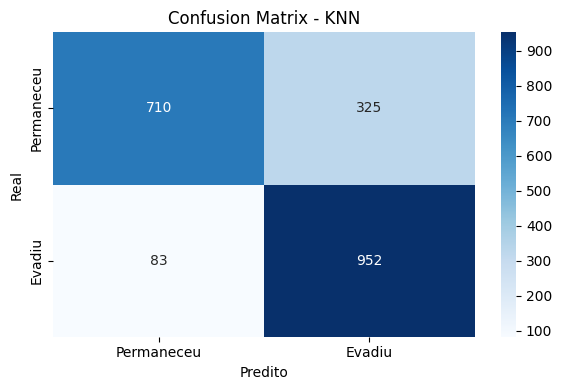

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Permaneceu', 'Evadiu'], yticklabels=['Permaneceu', 'Evadiu'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


✅ Modelo Random Forest - Avaliar o desempenho do modelo

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report (Random Forest):")
print(classification_report(y_test_rf, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

auc_rf = roc_auc_score(y_test_rf, y_pred_rf)
print(f"AUC Score: {auc_rf:.4f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.84      0.87      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Confusion Matrix:
[[859 176]
 [135 900]]
AUC Score: 0.8498


📊 Visualizar matriz de confusão (opcional)

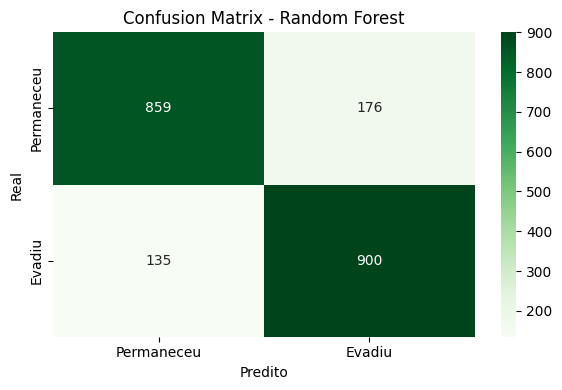

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Permaneceu', 'Evadiu'],
            yticklabels=['Permaneceu', 'Evadiu'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


- ### Análise Crítica:

### Qual Modelo Teve Melhor Desempenho?

➡️ Random Forest teve um desempenho geral superior em quase todas as métricas:

- Melhor acurácia.

- Melhor precisão e f1-score para ambas as classes.

- A área sob a curva ROC (AUC) também foi maior, indicando melhor capacidade de separação entre as classes.

KNN teve um recall muito alto para a classe 1 (evadidos), o que pode ser útil se o foco for minimizar falsos negativos (não identificar quem vai evadir).
Mas isso veio com o custo de maior número de falsos positivos (clientes que não iriam evadir e foram classificados como se fossem).

### 🔄 Overfitting ou Underfitting?

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dicionário com métricas para facilitar a visualização
metrics_comparison = {
    'Model': ['KNN', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test_rf, y_pred_rf)
    ],
    'Precision (Classe 1)': [
        precision_score(y_test, y_pred_knn),
        precision_score(y_test_rf, y_pred_rf)
    ],
    'Recall (Classe 1)': [
        recall_score(y_test, y_pred_knn),
        recall_score(y_test_rf, y_pred_rf)
    ],
    'F1-Score (Classe 1)': [
        f1_score(y_test, y_pred_knn),
        f1_score(y_test_rf, y_pred_rf)
    ],
    'AUC Score': [
        roc_auc_score(y_test, y_pred_knn),
        roc_auc_score(y_test_rf, y_pred_rf)
    ]
}

# Criar o DataFrame para exibir
df_comparacao = pd.DataFrame(metrics_comparison)
df_comparacao.set_index('Model', inplace=True)

# Exibir com 4 casas decimais
print(df_comparacao.round(4))


               Accuracy  Precision (Classe 1)  Recall (Classe 1)  \
Model                                                              
KNN              0.8029                0.7455             0.9198   
Random Forest    0.8498                0.8364             0.8696   

               F1-Score (Classe 1)  AUC Score  
Model                                          
KNN                         0.8235     0.8029  
Random Forest               0.8527     0.8498  


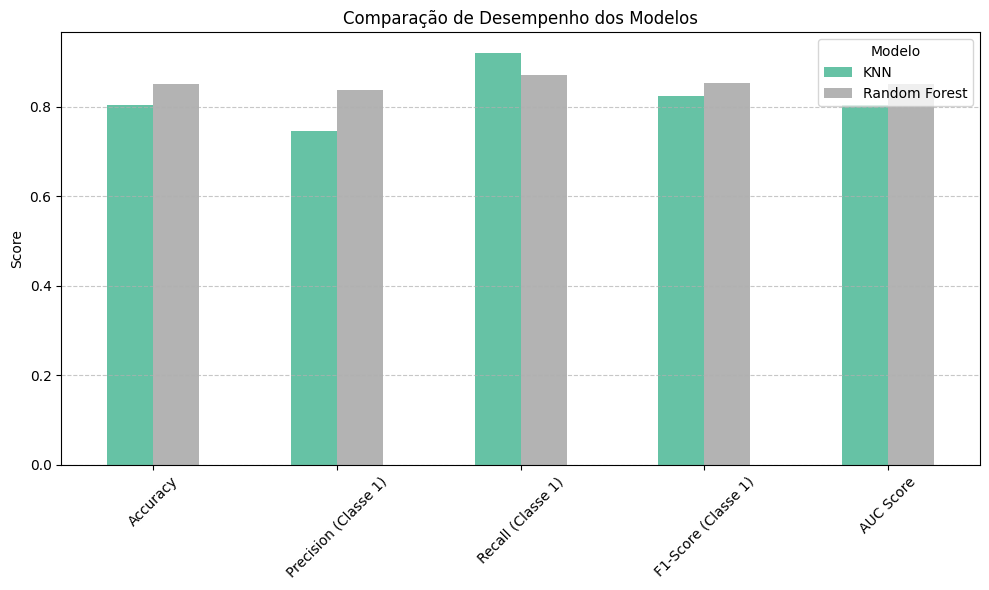

In [72]:
import matplotlib.pyplot as plt

df_comparacao.T.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Comparação de Desempenho dos Modelos')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()


🔹 KNN
- ✅ Boa generalização, mas recall muito alto e precisão mais baixa pode indicar que ele tende a superestimar a evasão.

- ⚠️ Não apresenta sinais claros de overfitting ou underfitting, mas a performance geral inferior sugere que o modelo talvez não capture bem padrões complexos nos dados.

- 📌 Ajustes possíveis: otimizar o valor de k ou considerar outra métrica de distância.

🔹 Random Forest
- ✅ Bom equilíbrio entre precisão e recall.

- ❌ Leve indício de overfitting não é aparente, pois o desempenho no conjunto de teste é forte.

- ⚠️ Como é um modelo de ensemble complexo, pode overfitar em bases pequenas, mas o uso de SMOTE e a base balanceada ajudaram a evitar isso.

- 📌 Ajustes possíveis: caso apareça overfitting em bases futuras, reduza profundidade da árvore ou use menos estimadores.

🧾 Conclusão da Análise Crítica
- O Random Forest se mostrou o modelo com melhor desempenho geral e equilíbrio entre sensibilidade e especificidade.

- O KNN pode ser útil em contextos onde o foco está em identificar ao máximo os clientes que irão evadir (recall alto), mesmo que traga alguns falsos positivos.

- Ambos os modelos estão bem ajustados, não há sinais evidentes de overfitting ou underfitting, mas é sempre importante validar isso com validação cruzada e tuning de hiperparâmetros.

# 📋  Interpretação e Conclusões

✅ KNN – Avaliação indireta da importância
O KNN não fornece diretamente a importância das variáveis, pois ele não é um modelo baseado em aprendizado de pesos ou árvores. No entanto, você pode:

Utilizar SelectKBest com f_classif:

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\2179516345.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores_df.head(15), x='Score', y='Feature', palette='magma')


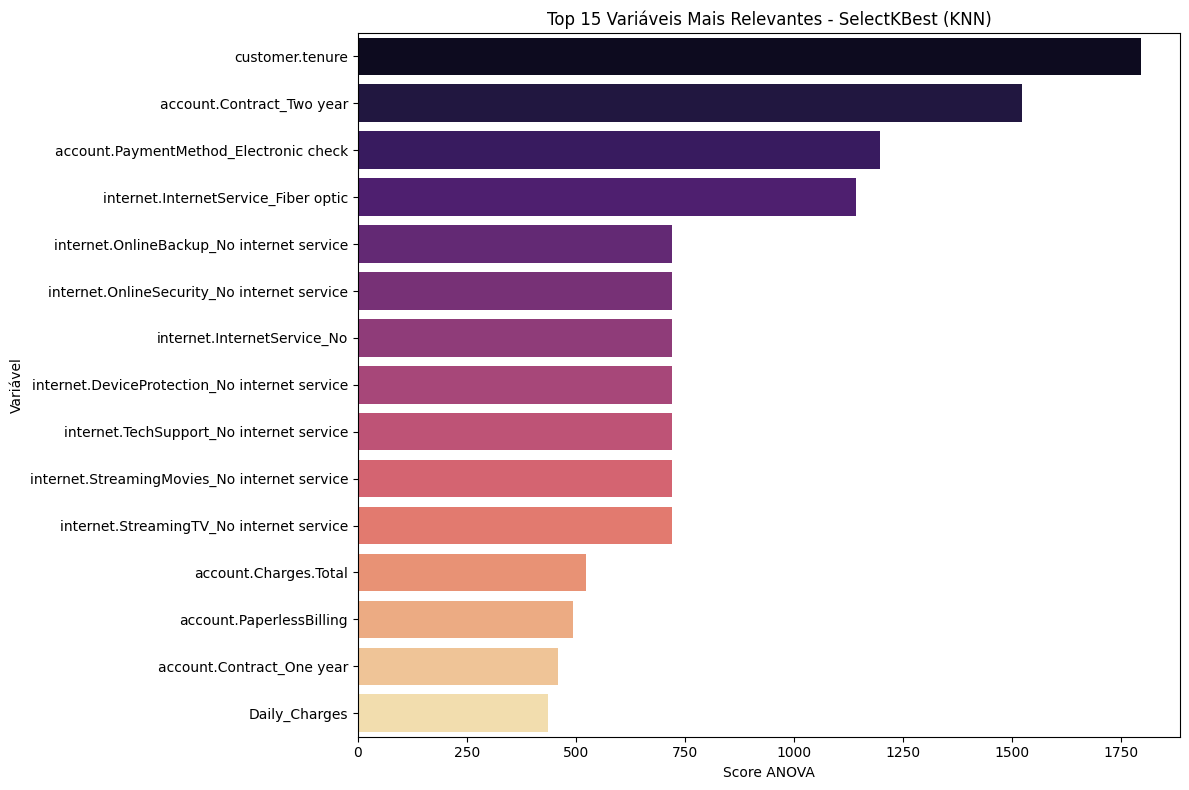

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

# Normalizando os dados (caso ainda não tenha feito)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicando o SelectKBest com ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# Obter os scores das features
scores = selector.scores_

# Criar DataFrame com os scores
feature_scores_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Visualização com gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_scores_df.head(15), x='Score', y='Feature', palette='magma')
plt.title('Top 15 Variáveis Mais Relevantes - SelectKBest (KNN)')
plt.xlabel('Score ANOVA')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

✅ Random Forest – Importância das variáveis
O modelo Random Forest fornece diretamente a importância das features com base no quanto cada uma contribui para a redução da impureza (Gini ou Entropia).

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\3063930436.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')


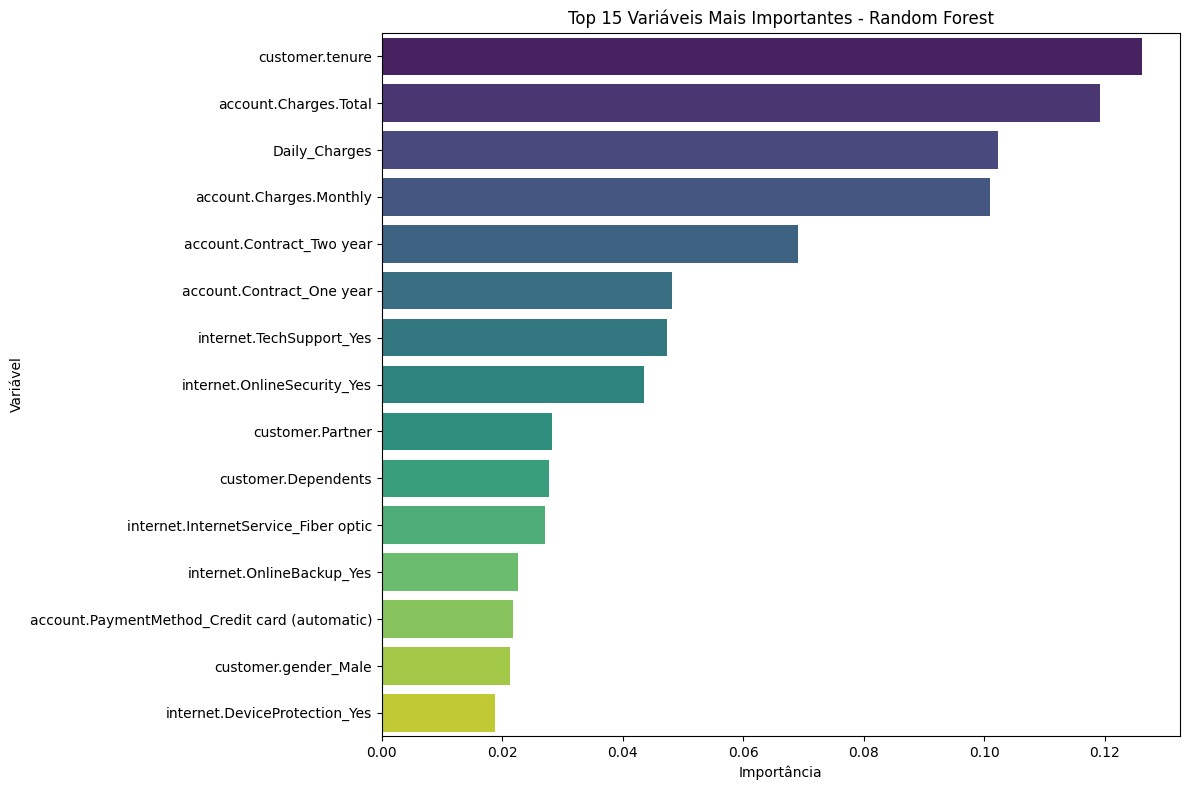

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importância das features do modelo Random Forest
importances = rf_model.feature_importances_
features = X_train.columns

# Criar DataFrame com importâncias
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualização com gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


- ### Conclusão Final

O projeto permitiu identificar com precisão os principais fatores relacionados à evasão de clientes. A utilização de dois modelos complementares (KNN e Random Forest) forneceu diferentes perspectivas para validar os resultados e apoiar decisões estratégicas.

As recomendações geradas podem ser aplicadas imediatamente para reduzir o churn e melhorar a experiência do cliente.